<a href="https://colab.research.google.com/github/AlejandroCarvajal49/Kolmogorov-Smirnoff/blob/main/C%C3%B3digo_KS_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de librerías y datos

In [7]:
library(readxl)
library(ggplot2)
if (!require("triangle")){install.packages("triangle");library(triangle)}else{library(triangle)}
if (!require("fitdistrplus")){install.packages("fitdistrplus");library(fitdistrplus)}else{library(fitdistrplus)}
options(repr.plot.width=15, repr.plot.height=8)
# Se importan los datos del archivo de Excel utilizando el paquete readxl.
# No olvide subir el archivo de excel antes.
Ej_datos <- read_excel("Clase.xlsx", sheet="Datos_waze")

##Visualización de datos

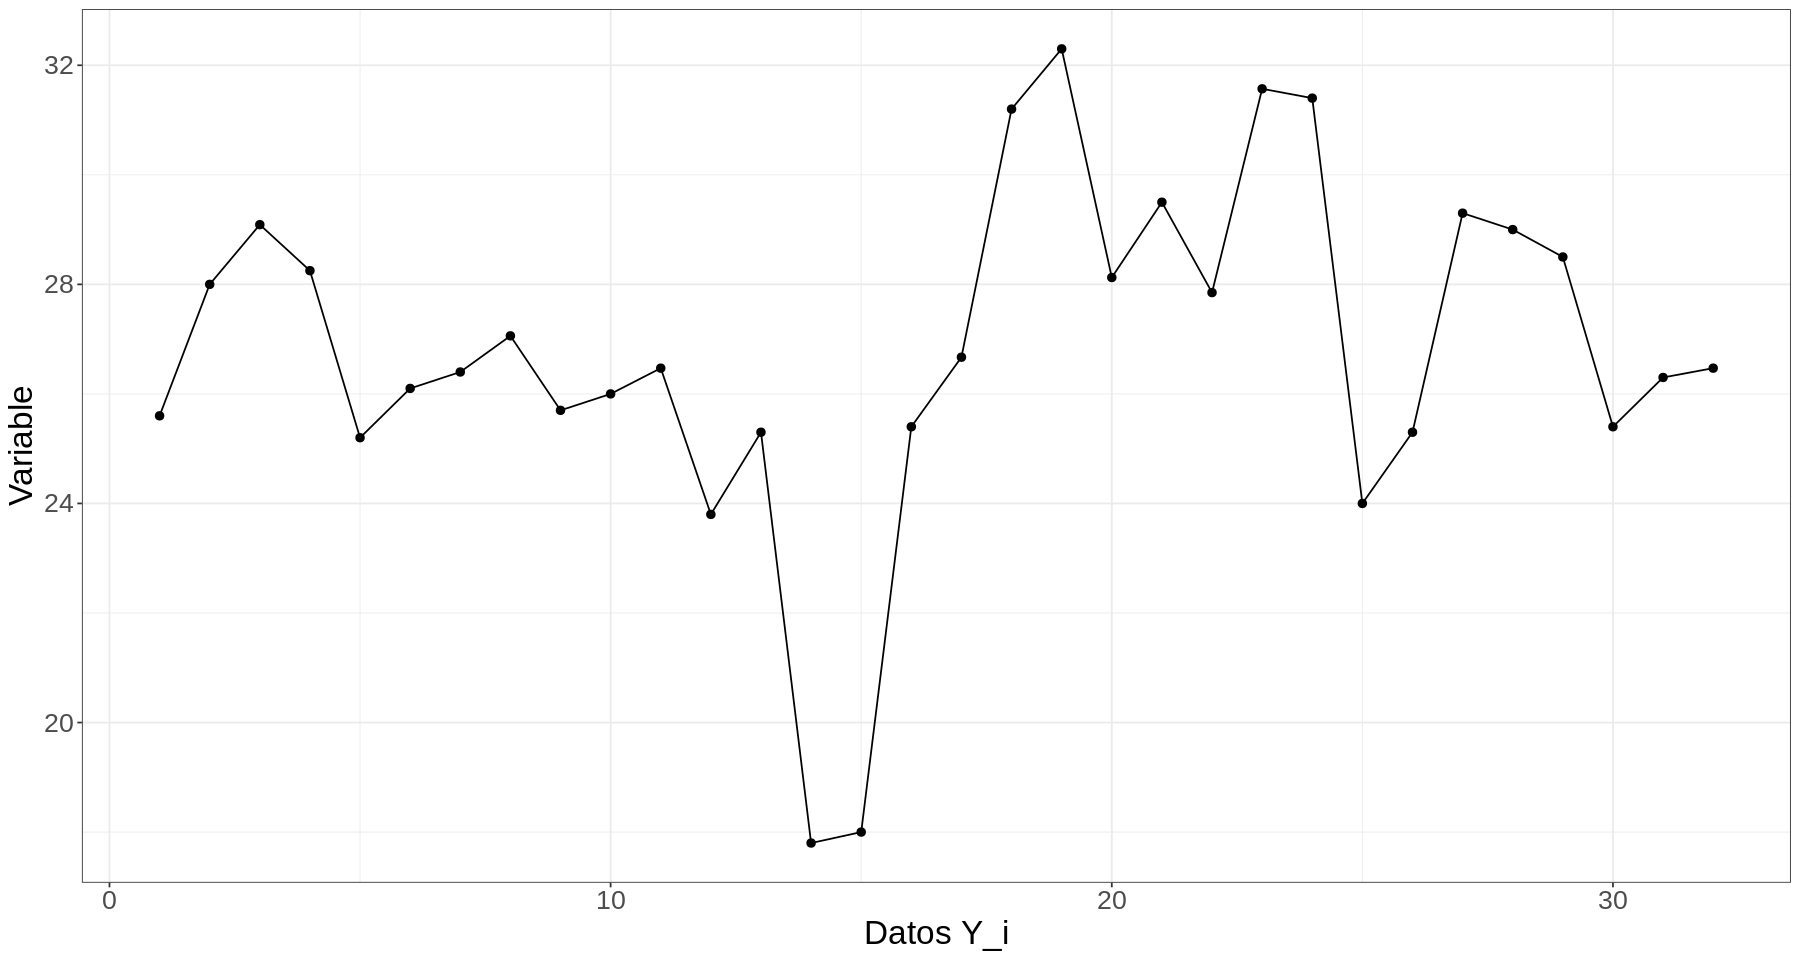

In [8]:
#Número de datos
n <- dim(Ej_datos)[1]
Y_i <- Ej_datos$x_i

#Visualización gráfica de datos
data_graph <- data.frame(ID=seq(1,n,1),x_i=Y_i)
plot <- ggplot(data_graph, aes(ID, x_i)) + geom_point(size=2) + geom_line() +
  xlab("Datos Y_i") + ylab("Variable") + theme_bw() + theme(text = element_text(size = 20))
print(plot)

## Prueba Kolmogorov - Smirnov

Antes de realizar la prueba Kolmogorov - Smirnov, hagamos unas gráficas PP plot y QQ plot para la distribución triangular propuesta, usando el mismo código disponible en el notebook "Codigo_QQ_y_PP_plot.ipynb":

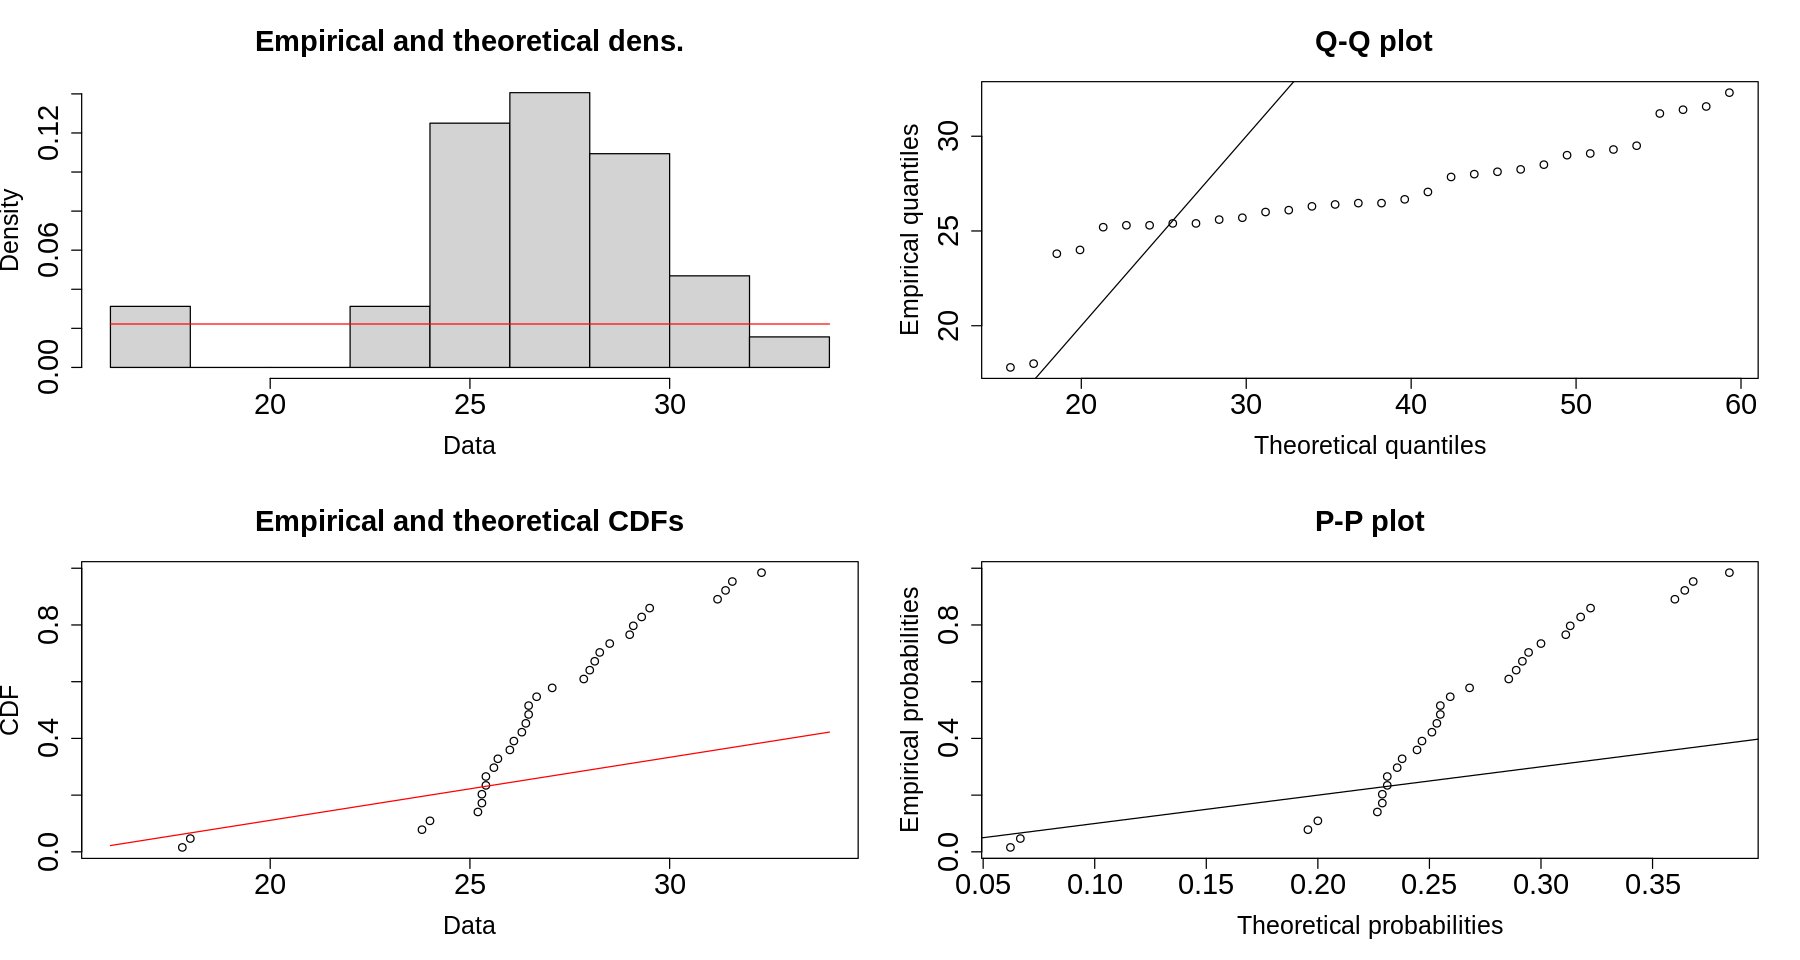

In [9]:
#TRIANGULAR
#Use la abreviación "triangle" y defina el mínimo en "a", el máximo en "b" y la moda en "c"
plotdist(Y_i, "unif", para=list(min=15, max=60), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

Ahora, procedemos a realizar la prueba utilizando la función *ks.test* de paquete base de R, donde sólo tenemos que ingresar la muestra a analizar (*Y_i* ), el código de la distribución a evaluar (ver lista más abajo) y los parámetros de la distribución.

In [10]:
#UNIFORME
#Use la abreviación "punif" y defina mínimo en "min" y el máximo en "max"
ks.test(Y_i, punif, min=15, max=60)

#TRIANGULAR
#Use la abreviación "ptriangle" y defina el mínimo en "a", el máximo en "b" y la moda en "c"
#ks.test(Y_i, ptriangle, a=5, b=60, c=45)

#EXPONENCIAL
#Exponencial, use la abreviación "pexp" y defina la tasa en "rate"
#ks.test(Y_i, pexp, rate=1)

#NORMAL
#Use la abreviación "pnorm" y defina la media en "mean" y desviación estándar "sd"
#ks.test(Y_i, pnorm, mean=0, sd=1)

#LOGNORMAL
#Use la abreviación "plnorm" y defina los parámetros de la normal asociada, media en "meanlog" y desviación estándar "sdlog"
#ks.test(Y_i, plnorm, meanlog=0, sdlog=1)

#GAMMA
#Use la abreviación "pgamma" y defina el parámetro de forma en "shape" y la tasa en "rate"
#ks.test(Y_i, pgamma, shape=1, rate=1)

#WEIBULL
#Use la abreviación "pweibull" y defina el parámetro de forma en "shape" y el parámetro de escala en "scale"
#ks.test(Y_i, pweibull, shape=1, scale=1)

Warning message in ks.test.default(Y_i, punif, min = 15, max = 60):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Y_i
D = 0.61556, p-value = 5.879e-11
alternative hypothesis: two-sided


Tenga en cuenta que, siempre que tenga datos repetidos, la función entregará una advertencia indicando que no deberían estar presentes ya que una distribución continua no genera valores repetidos. Sin embargo, la prueba se ejecutará sin inconvenientes.